In [65]:
import pandas as pd
import numpy as np

In [66]:
from google.colab import files
uploaded = files.upload()

Saving Housing.csv to Housing (1).csv


In [67]:
df = pd.read_csv("Housing.csv")
print(df.head())

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [68]:
# цільова змінна
y = (df['price'].values)
print(y.shape) # розмірність вектора змінної y (545,)

# вихідна матриця окремих ознак (area,'bathrooms,bedrooms)
X_raw = df[['area', 'bathrooms', 'bedrooms']].values
print(X_raw)
# розмірність матриці ознак
print(X_raw.shape) # (545, 3)
m = X_raw.shape[0] #  545
n = X_raw.shape[1] #  3
print(m,n)

(545,)
[[7420    2    4]
 [8960    4    4]
 [9960    2    3]
 ...
 [3620    1    2]
 [2910    1    3]
 [3850    1    3]]
(545, 3)
545 3


In [69]:
# Нормалізація ознак (масштабування)
X_norm = (X_raw - X_raw.mean(axis=0)) / X_raw.std(axis=0)
print("Mean:", np.round(X_raw.mean(axis=0), 6))
print("Std:", np.round(X_raw.std(axis=0), 6))

Mean: [5.15054128e+03 1.28623900e+00 2.96513800e+00]
Std: [2.16814915e+03 5.02008000e-01 7.37386000e-01]


In [70]:

# ініціалізація вагів без врахування bies(w0)
w = np.zeros(n)
print(w)

# Створюємо X — матрицю ознак з урахуванням bias (w0) Для цього створюємо стовпець одиниць який  додається до вихідної матриці ознак для коректного врахування параметра зсуву w₀, що забезпечує більшу гнучкість моделі та зменшує похибку прогнозу
X = np.hstack((np.ones((m, 1)), X_norm))
print(X.shape)

# ініціалізація вагів з врахування bies(w0)
w = np.zeros(X.shape[1]) # [0. 0. 0. 0.]
print(w)
# З bias модель виглядає: y_hat[i] = w0*1 + w1*area[i] + w2*bathrooms[i] + w3*bedrooms[i]


[0. 0. 0.]
(545, 4)
[0. 0. 0. 0.]


In [71]:
import numpy as np
# 1) Функція гіпотези лінійної регресії (векторно)
def hypothesis(X, w):
    """
    X: матриця ознак розмір (m, n+1), перший стовпчик = 1
    w: вектор вагів позміром (n+1, )
    h(x)=w0​+w1​x1​+w2​x2​+w3​x3​
    """
    return X @ w # скалярний добуток вектора вагів та матрицю ознак

In [72]:
# 2) Функція втрат у векторному вигляді MSE (середньоквадратична)
def loss_function(X, y, w):
    m = len(y)
    predictions = hypothesis(X, w)
    errors = predictions - y
    return (1 / (2 * m)) * np.dot(errors, errors)

In [73]:
# 3) крок градієнтного спуску
def gradient_descent_step(X, y, w, alpha):
    m = len(y) # кількість справжніх цільових значень
    predictions = hypothesis(X, w) # передбачення
    errors = predictions - y # рахуємо помилку наскільки модель помилилася для кожної спарвжньої цільової змінної датасета

    gradient = (1 / m) * (np.dot (X.T , errors))
    new_w = w - alpha * gradient # Функція повертає нові ваги,які зменшують помилку

    return new_w

In [74]:
# Навчання моделі
w = np.zeros(X.shape[1])  # початкові ваги, старт [0,0,0,0]
alpha = 0.01             # швидкість навчання
iterations = 2000         # кількість ітерацій
mse_values = []  # mse для графіка
iteration_numbers = []  # число ітерацій
for i in range(iterations):
    w = gradient_descent_step(X, y, w, alpha) #

    if i % 200 == 0:
        mse = loss_function(X, y, w)
        print(f"Iteration {i:4d} → MSE = {mse:.3e}")
        mse_values.append(mse)
        iteration_numbers.append(i)

print("-----------------------")
print("\nНайкращі параметри w:")
print("w0 (bias):", w[0])
print("w1 (area):", w[1])
print("w2 (bathrooms):", w[2])
print("w3 (bedrooms):", w[3])
print("-------------------")
# рахуємо втрати для найкращих парметрів w після навчання
final_mse = loss_function(X, y, w)
print("\nFinal MSE:", final_mse)



Iteration    0 → MSE = 1.286e+13
Iteration  200 → MSE = 1.101e+12
Iteration  400 → MSE = 8.993e+11
Iteration  600 → MSE = 8.957e+11
Iteration  800 → MSE = 8.956e+11
Iteration 1000 → MSE = 8.956e+11
Iteration 1200 → MSE = 8.956e+11
Iteration 1400 → MSE = 8.956e+11
Iteration 1600 → MSE = 8.956e+11
Iteration 1800 → MSE = 8.956e+11
-----------------------

Найкращі параметри w:
w0 (bias): 4766729.238822399
w1 (area): 821214.2165563407
w2 (bathrooms): 695807.9313573696
w3 (bedrooms): 299984.1307656611
-------------------

Final MSE: 895585024988.8678


In [75]:
# аналітичне рішення (нормальне рівняння)
w_analytic = np.linalg.inv(X.T @ X) @ X.T @ y

print("w (gradient descent):")
print(w)

print("\nw (Аналітичне рішення (коефіціенти)):")
print(w_analytic)

w (gradient descent):
[4766729.2388224   821214.21655634  695807.93135737  299984.13076566]

w (Аналітичне рішення (коефіціенти)):
[4766729.24770642  821214.14349519  695808.52272538  299983.57107963]


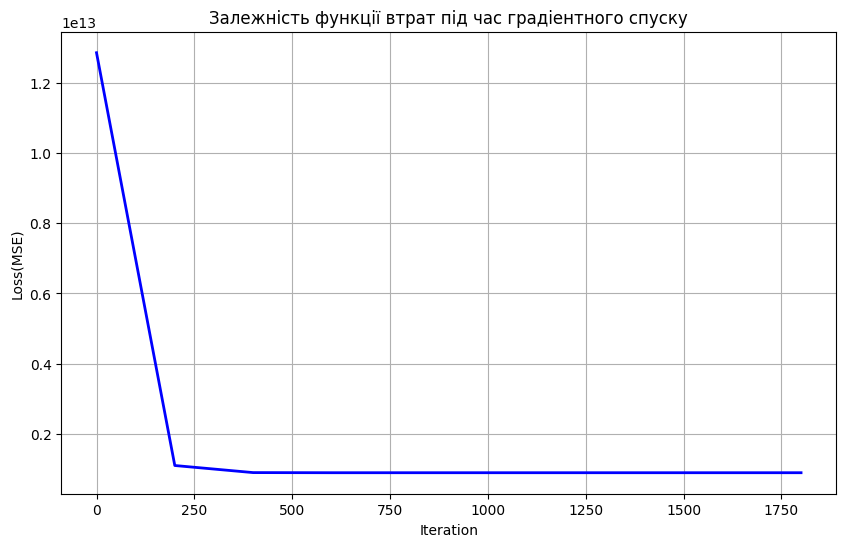

In [76]:
# графік залежності функції втрат під час градієнтного спуску
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(iteration_numbers, mse_values, color='blue', linewidth=2)
plt.xlabel("Iteration")
plt.ylabel("Loss(MSE)")
plt.title("Залежність функції втрат під час градіентного спуску")
plt.grid(True)
plt.show()

In [77]:
from sklearn.linear_model import LinearRegression

# модель
model = LinearRegression()

# навчання моделі
model.fit(X, y)

# параметри
print("w0 (bias):", model.intercept_)
print("w1 (area):", model.coef_[1])
print("w2 (bathrooms):", model.coef_[2])
print("w3 (bedrooms):", model.coef_[3])



w0 (bias): 4766729.247706422
w1 (area): 821214.1434951894
w2 (bathrooms): 695808.5227253675
w3 (bedrooms): 299983.5710796334
